<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/models/Right_to_Counsel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install --upgrade oryx 

In [32]:
from functools import partial 
import oryx 
import jax
import jax.numpy as jnp 
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
from oryx.core.ppl import random_variable

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

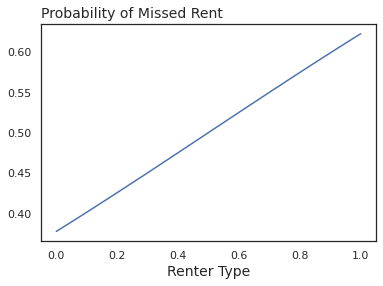

In [34]:
def prob_fn(id_type):
  return jax.nn.sigmoid(id_type-.5)

id_types = jnp.linspace(0., 1., 100)
ps = jax.vmap(prob_fn)(id_types)

plt.title('Probability of Missed Rent', loc='left', size=14)
plt.plot(id_types, ps)
plt.xlabel('Renter Type', size=14)
plt.show()

In [41]:
def experiment(f, key, id_type):
  probs = f(id_type)
  return random_variable(tfd.Bernoulli(probs=probs))(key)

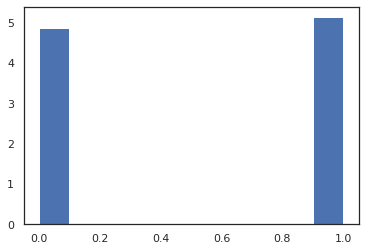

In [48]:
n = 1000 
init_key = jax.random.PRNGKey(0)
subkey1, subkey2 = jax.random.split(init_key)

ids = jax.random.uniform(subkey1, shape=(n,))
keys = jax.random.split(subkey2, n)
samples = jax.vmap(partial(experiment, prob_fn))(keys, ids)
plt.hist(samples, density=True)
plt.show()